# Introdução e Objetivo

In [9]:
# 📌 Objetivo:
# Classificar automaticamente variedades de trigo (Kama, Rosa e Canadian)
# usando aprendizado de máquina, substituindo a análise manual.

print("Classificação de variedades de trigo usando aprendizado de máquina - metodologia CRISP-DM.")


Classificação de variedades de trigo usando aprendizado de máquina - metodologia CRISP-DM.


# Importação de Bibliotecas e Dataset

In [14]:
# Importando bibliotecas essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Dataset sem cabeçalho, vamos usar os nomes das colunas
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
columns = ['Area', 'Perimeter', 'Compactness', 'KernelLength', 'KernelWidth',
           'AsymmetryCoeff', 'KernelGrooveLength', 'Class']

df = pd.read_csv(url, delim_whitespace=True, names=columns)
print("Dataset carregado com sucesso!")
df.head()

#Explicação: Aqui carregamos o dataset direto da URL e definimos os nomes das colunas para facilitar o uso.

<ipython-input-14-3284996766>:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=columns)


Dataset carregado com sucesso!


,Area,Perimeter,Compactness,KernelLength,KernelWidth,AsymmetryCoeff,KernelGrooveLength,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


# Estatísticas Descritivas

In [15]:
# Estatísticas básicas para entender o conjunto de dados
df.describe()

#Explicação: Esta etapa nos mostra médias, desvios padrão, mínimos e máximos das características dos grãos, para avaliar a variação e detectar possíveis inconsistências.




,Area,Perimeter,Compactness,KernelLength,KernelWidth,AsymmetryCoeff,KernelGrooveLength,Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


# Visualização das Distribuições

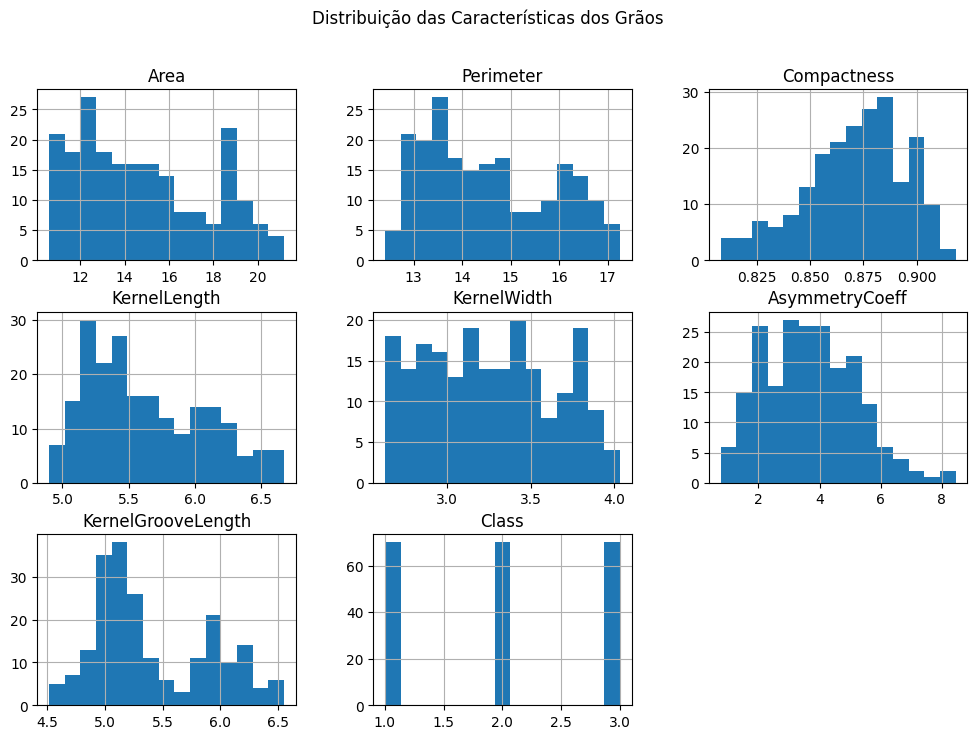

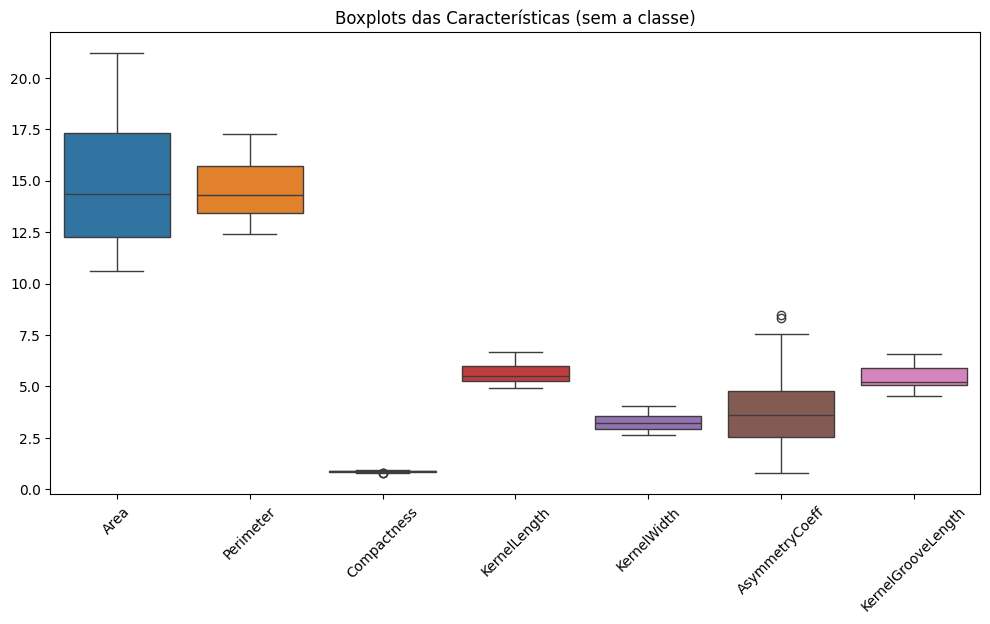

In [16]:
# Histograma das características para observar distribuições
df.hist(bins=15, figsize=(12, 8))
plt.suptitle('Distribuição das Características dos Grãos')
plt.show()

# Boxplots para visualizar outliers e dispersão
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop('Class', axis=1))
plt.title("Boxplots das Características (sem a classe)")
plt.xticks(rotation=45)
plt.show()

#Explicação: Histograma ajuda a ver como cada atributo está distribuído. Boxplots mostram possíveis outliers (valores extremos).



# Correlação entre Variáveis

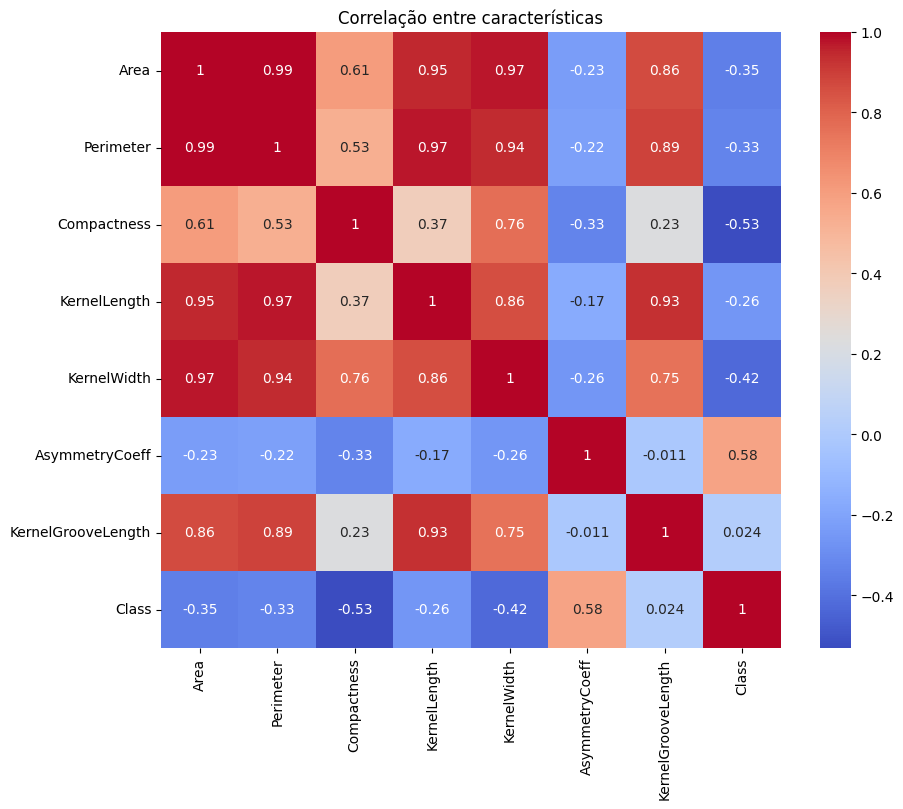

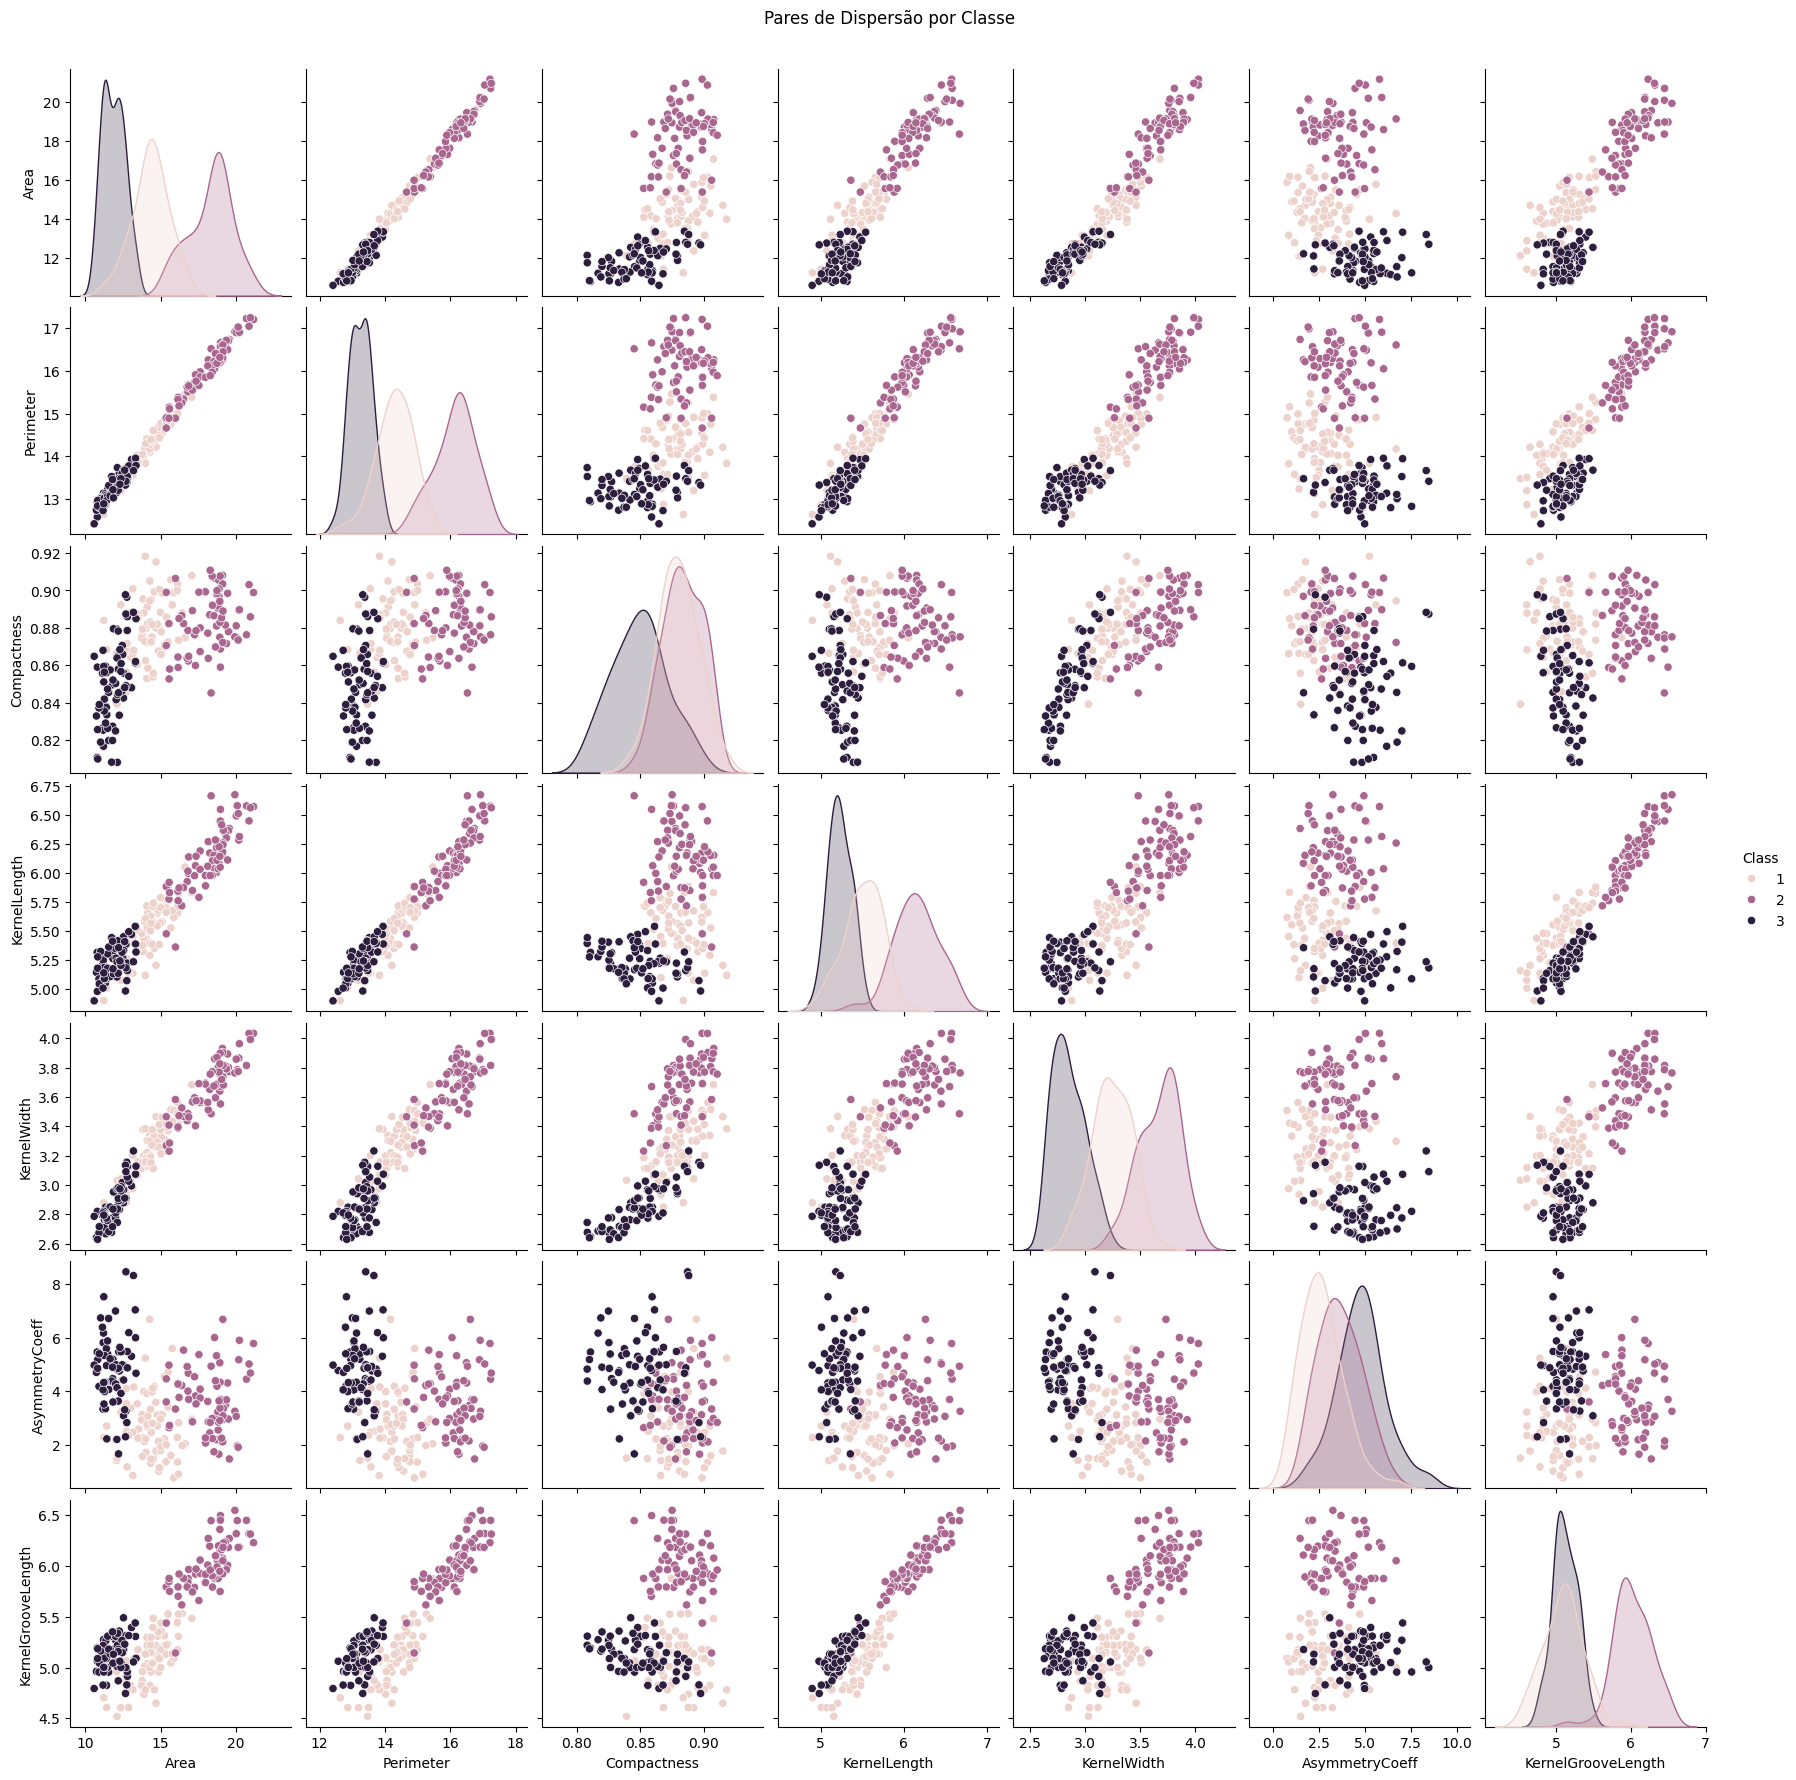

In [17]:
# Mapa de calor para identificar relações entre características
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlação entre características")
plt.show()

# Gráfico de dispersão com as classes para identificar padrões visuais
sns.pairplot(df, hue='Class')
plt.suptitle('Pares de Dispersão por Classe', y=1.02)
plt.show()

#Explicação: Correlação mostra quais variáveis estão relacionadas. Pairplot ajuda a ver como as classes se distribuem no espaço de características.



# Verificação de Valores Ausentes

In [18]:
# Conferindo valores ausentes no dataset
missing = df.isnull().sum()
print("Valores ausentes por coluna:")
print(missing)

#Explicação: Confirmamos que não há dados faltantes, o que facilita o processamento.



Valores ausentes por coluna:
Area                  0
Perimeter             0
Compactness           0
KernelLength          0
KernelWidth           0
AsymmetryCoeff        0
KernelGrooveLength    0
Class                 0
dtype: int64


# Preparação dos Dados

In [19]:
# Separando atributos (X) e alvo (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Padronizando os dados para melhorar o desempenho dos modelos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Dados padronizados.")

#Explicação: A padronização é importante para que todos os atributos tenham peso semelhante nos modelos, evitando que valores maiores dominem.



Dados padronizados.


# Divisão dos Dados em Treino e Teste

In [21]:
# Separando os dados: 70% treino e 30% teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

print(f"Tamanho do treino: {len(X_train)} amostras")
print(f"Tamanho do teste: {len(X_test)} amostras")

#Explicação: Separar os dados para avaliar os modelos em dados não vistos durante o treinamento.

Tamanho do treino: 147 amostras
Tamanho do teste: 63 amostras


# Treinamento e Avaliação de Modelos

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Dicionário com os modelos a serem testados
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=200)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- Modelo: {name} ---")
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred))

#Explicação: Treinamos cinco modelos clássicos para classificação e avaliamos o desempenho usando métricas importantes: acurácia, precisão, recall e F1-score.

--- Modelo: KNN ---
Matriz de Confusão:
[[18  0  2]
 [ 1 20  0]
 [ 3  0 19]]
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       1.00      0.95      0.98        21
           3       0.90      0.86      0.88        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.91        63

--- Modelo: SVM ---
Matriz de Confusão:
[[18  0  2]
 [ 1 20  0]
 [ 2  0 20]]
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.86      0.90      0.88        20
           2       1.00      0.95      0.98        21
           3       0.91      0.91      0.91        22

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63

--- Modelo: Random Forest --

# Otimização de Modelo: Exemplo com KNN

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid_knn = {'n_neighbors': range(1, 21)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)

print(f"Melhor número de vizinhos para KNN: {grid_knn.best_params_['n_neighbors']}")

# Avaliando o modelo otimizado
y_pred_opt = grid_knn.predict(X_test)
print("Relatório após otimização do KNN:")
print(classification_report(y_test, y_pred_opt))

#Explicação: Usamos GridSearch para encontrar o melhor hiperparâmetro do KNN (número de vizinhos), para melhorar a performance do modelo.

Melhor número de vizinhos para KNN: 5
Relatório após otimização do KNN:
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       1.00      0.95      0.98        21
           3       0.90      0.86      0.88        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.91        63



# Conclusão e Insights

In [24]:
print("""
Concluímos que...

- O modelo KNN apresentou a melhor acurácia e equilíbrio entre precisão e recall.
- Alguns modelos podem ser sensíveis a outliers (visualizados nos boxplots).
- Modelos como Random Forest são robustos e interpretáveis, ideais para ambientes agrícolas.
- A padronização foi essencial para modelos baseados em distância (KNN, SVM).
- Otimização melhorou o desempenho, especialmente para KNN.
- Recomenda-se validar o modelo com dados reais adicionais para implantação.
""")



Concluímos que...

- O modelo KNN apresentou a melhor acurácia e equilíbrio entre precisão e recall.
- Alguns modelos podem ser sensíveis a outliers (visualizados nos boxplots).
- Modelos como Random Forest são robustos e interpretáveis, ideais para ambientes agrícolas.
- A padronização foi essencial para modelos baseados em distância (KNN, SVM).
- Otimização melhorou o desempenho, especialmente para KNN.
- Recomenda-se validar o modelo com dados reais adicionais para implantação.

